In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('2017_jun_final - 2017_jun_final.csv')
print(df.head())

   N                      Role Programming language Specialisation   \
0  1        Junior QA engineer                  NaN       Manual QA   
1  2        Junior QA engineer                  NaN       Manual QA   
2  3         Software Engineer              C#/.NET             NaN   
3  4         Software Engineer           JavaScript             NaN   
4  5  Senior Software Engineer           JavaScript             NaN   

         Experience  Experience on current job  Salary/month  \
0                0.5                       0.5           400   
1  loss then 3 month         loss then 3 month           430   
2                  4                         1          2500   
3                  5                         4          2000   
4               10+                        0.5          4500   

   Изменение.зарплаты.за.12.месяцев       City              Company size  ...  \
0                                 0  New York         up to 10 employees  ...   
1                         

In [39]:
print(f'Verses: {df.shape[0]}; Columns: {df.shape[1]}')

Verses: 8704; Columns: 25


In [40]:
print(df.dtypes)

N                                     int64
Role                                 object
Programming language                 object
Specialisation                       object
Experience                           object
Experience on current job            object
Salary/month                          int64
Изменение.зарплаты.за.12.месяцев      int64
City                                 object
Company size                         object
Company type                         object
Gender                               object
Age                                   int64
Education                            object
University                           object
Still student                          bool
English                              object
Subject.area                         object
Date                                 object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [41]:
print(df.isnull().sum() / len(df))

N                                   0.000000
Role                                0.000000
Programming language                0.442325
Specialisation                      0.829389
Experience                          0.000000
Experience on current job           0.000000
Salary/month                        0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
City                                0.000000
Company size                        0.000000
Company type                        0.000000
Gender                              0.000000
Age                                 0.000000
Education                           0.000000
University                          0.177619
Still student                       0.000000
English                             0.000000
Subject.area                        0.025620
Date                                0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [42]:
excluded = df['Programming language']
df = df.dropna(axis=1)
df.insert(2, 'Programming language', excluded)
print(df)

         N                      Role Programming language        Experience   \
0        1        Junior QA engineer                  NaN                0.5   
1        2        Junior QA engineer                  NaN  loss then 3 month   
2        3         Software Engineer              C#/.NET                  4   
3        4         Software Engineer           JavaScript                  5   
4        5  Senior Software Engineer           JavaScript               10+    
...    ...                       ...                  ...                ...   
8699  8700               QA engineer                  NaN                  1   
8700  8701                 Marketing                  NaN                0.5   
8701  8702  Junior Software Engineer           Ruby/Rails                  1   
8702  8703                 Team lead                  NaN                  6   
8703  8704  Senior Software Engineer                 Java                  7   

     Experience on current job  Salary/

In [43]:
print(df.isnull().sum() / len(df))

N                                   0.000000
Role                                0.000000
Programming language                0.442325
Experience                          0.000000
Experience on current job           0.000000
Salary/month                        0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
City                                0.000000
Company size                        0.000000
Company type                        0.000000
Gender                              0.000000
Age                                 0.000000
Education                           0.000000
Still student                       0.000000
English                             0.000000
Date                                0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64


In [44]:
df = df.dropna()
print(df)

         N                      Role Programming language Experience   \
2        3         Software Engineer              C#/.NET           4   
3        4         Software Engineer           JavaScript           5   
4        5  Senior Software Engineer           JavaScript        10+    
6        7  Junior Software Engineer              C#/.NET           1   
7        8  Senior Software Engineer                  C++           6   
...    ...                       ...                  ...         ...   
8692  8693         Software Engineer                 Java           5   
8694  8695  Junior Software Engineer              C#/.NET           1   
8695  8696         Software Engineer               Python           1   
8701  8702  Junior Software Engineer           Ruby/Rails           1   
8703  8704  Senior Software Engineer                 Java           7   

     Experience on current job  Salary/month  \
2                            1          2500   
3                          

In [45]:
print(f'Verses: {df.shape[0]}; Columns: {df.shape[1]}')

Verses: 4854; Columns: 20


In [46]:
python_data = df[df['Programming language'] == 'Python']
print(python_data)

         N                      Role Programming language Experience   \
12      13         Software Engineer               Python           1   
68      69         Software Engineer               Python         1.5   
87      88  Junior Software Engineer               Python         0.5   
114    115  Junior Software Engineer               Python         1.5   
143    144  Junior Software Engineer               Python           1   
...    ...                       ...                  ...         ...   
8546  8547         Software Engineer               Python           5   
8625  8626         Software Engineer               Python           4   
8635  8636  Senior Software Engineer               Python        10+    
8673  8674  Junior Software Engineer               Python         0.5   
8695  8696         Software Engineer               Python           1   

     Experience on current job  Salary/month  \
12           loss then 3 month           800   
68                         

In [47]:
print(f'Verses: {python_data.shape[0]}; Columns: {python_data.shape[1]}')

Verses: 207; Columns: 20


In [48]:
grouped = python_data.groupby(['Role'])
agg_data = grouped['Salary/month'].agg(['min', 'max'])
print(agg_data)

                           min   max
Role                                
Junior Software Engineer   100  1250
Senior Software Engineer  1300  9200
Software Engineer          500  5400
System Architect          3000  5000
Technical Lead            1425  6200


In [49]:
avg_salary = grouped['Salary/month'].mean()
def fill_avg_salary(role):
    return avg_salary[role].mean()

final = python_data.copy()
final['avg'] = python_data['Role'].apply(fill_avg_salary)
print(python_data)

         N                      Role Programming language Experience   \
12      13         Software Engineer               Python           1   
68      69         Software Engineer               Python         1.5   
87      88  Junior Software Engineer               Python         0.5   
114    115  Junior Software Engineer               Python         1.5   
143    144  Junior Software Engineer               Python           1   
...    ...                       ...                  ...         ...   
8546  8547         Software Engineer               Python           5   
8625  8626         Software Engineer               Python           4   
8635  8636  Senior Software Engineer               Python        10+    
8673  8674  Junior Software Engineer               Python         0.5   
8695  8696         Software Engineer               Python           1   

     Experience on current job  Salary/month  \
12           loss then 3 month           800   
68                         

In [50]:
print(final.avg.describe(include='avg'))

count     207.000000
mean     1753.937198
std       996.562606
min       560.841270
25%       560.841270
50%      1799.070000
75%      1799.070000
max      4000.000000
Name: avg, dtype: float64


In [51]:
#final.to_csv('final.csv')

                      Count
Programming language       
Java                   1049
JavaScript             1023
C#/.NET                 832
PHP                     801
C++                     216
Python                  207
Swift                   161
Ruby/Rails              154
Objective-C              93
C                        54


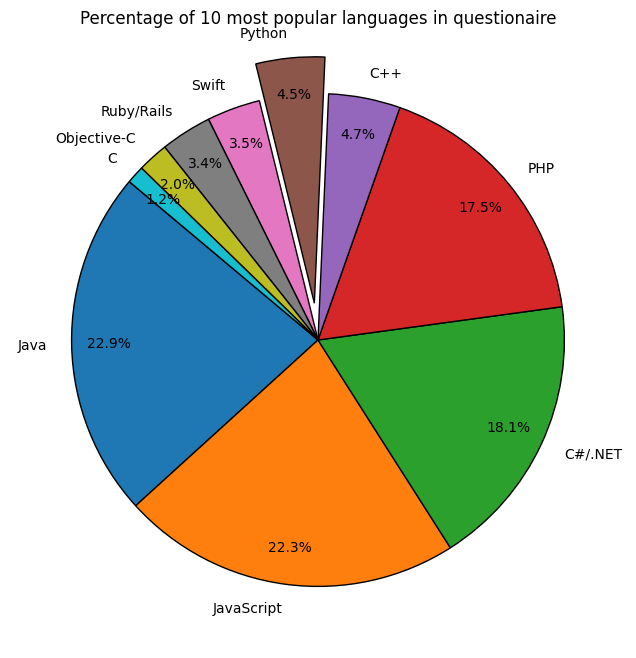

In [71]:
languages = df.groupby('Programming language').agg('count')
languages = languages.iloc[:, [0]]
languages.columns = ['Count']
languages = languages.sort_values('Count', ascending=False)
languages = languages[0:10]
print(languages)

plt.figure(figsize=(12, 8))
plt.pie(languages['Count'],
        labels=languages.index,
        startangle=140,
        pctdistance=0.85,
        labeldistance=1.1,
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        explode=[0, 0, 0, 0, 0, 0.15, 0, 0, 0, 0]
       )
plt.title('Percentage of 10 most popular languages in questionaire')
plt.show()


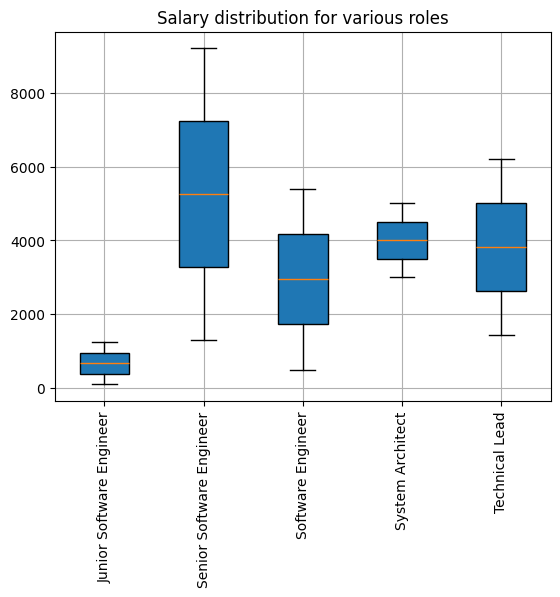

In [97]:
boxplot_data = [agg_data.loc[role].tolist() for role in agg_data.index]
plt.boxplot(boxplot_data, tick_labels=agg_data.index, vert=True, patch_artist=True)
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Salary distribution for various roles')
plt.show()

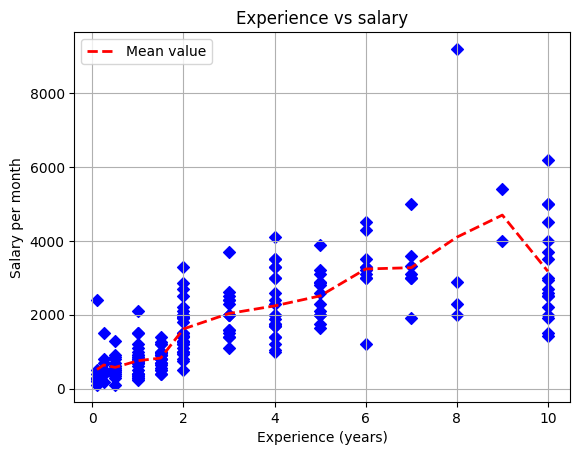

In [137]:
salary_exp = python_data.iloc[:, [3, 5]].copy()
salary_exp['Experience '] = salary_exp['Experience '].replace({'10+ ': 10})
salary_exp['Experience '] = salary_exp['Experience '].replace({'loss then 3 month': 0.1})
salary_exp['Experience '] = salary_exp['Experience '].astype(float)

mean_salary = salary_exp.groupby('Experience ').mean().reset_index()

plt.scatter(salary_exp['Experience '], salary_exp['Salary/month'], color='blue', marker='D')
plt.plot(mean_salary['Experience '], mean_salary['Salary/month'], color='red', linestyle='--', linewidth=2, label='Mean value')
plt.xlabel('Experience (years)')
plt.ylabel('Salary per month')
plt.title('Experience vs salary among Python users')
plt.grid(True)
plt.legend()
plt.show()